# Linear Regression Proof

Using the linear regression algorithm, we can approximate a function that will model a system. In the case of a linear regression, we hope that the data is somewhat linear so that it can be modeled by a line. We can use this function to make predictions for new input.

## Proof

First we will do a proof of the linear regression and then we will implement a custom linear regression algorithm based on our proof and then finally compare that to the mainstream scikit-learn implementation.

In [155]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For example, consider the plot below, the scatter points are random, but for this example, lets imagine we are analzing the prices of homes. In the chart below the x axis can represent the square footage of a house and the y axis is the price of the house. It looks like there is a pretty clear correlation between sq footage and price. Let's create a function that given a sq footage can predict the price of a house: this is called a regression function.

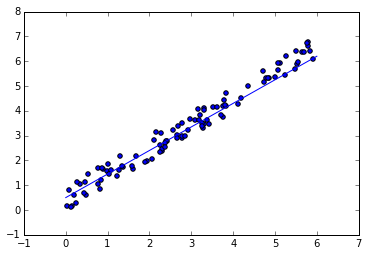

In [156]:
N=100
x = np.random.rand(N) *6
y = x + np.random.rand(N)*1
plt.scatter(x,y)
plt.plot([0,6],[0.5,6.2])

The goal of a regression function is to find a function for line that will fit between each of the points with the best fit. For the scatter plot above, we can apporximate a function that will minimuze the error between the function value $y$ at $x$ and the actual value of $y$ at $x$. The error can be measured by:

$$Error = y_n - (mx_n+b)$$

We will then square the error: _See note in appendix about why we are using the squared error_

$$SquaredError = (y_n - (mx_n+b))^2$$

If we sum all the errors for each point our scatter we have our error function:

$$SE_{line}=(y_1 - (mx_1+b))^2 + (y_2 - (mx_2+b))^2 + ... + (y_n - (mx_n+b))^2$$

$SE_{line}$ is the sum of the errors of our regression line. Thereore, the larger this number, the less accurate this line would be and by the same logic, the smaller the number the more accurate the regression line. So, by that logic it would say that if we find $m$ and $x$ such that it is the minimum possible value of $SE_{line}$ then we know that we have the most accurate regression line. Before we discuss findind the minimum of $SE_{line}$, lets first do some algebra to get $SE_{line}$ into a more convient form.

Expand the binomials...

$$SE_{line}=y_1^2-2y_1(mx_1+b)+(mx_2+b)^2+y_2^2-2y_2(mx_2+b)+(mx_2+b)^2+...+y_n^2-2y_n(mx_n+b)+(mx_n+b)^2$$

Group similar terms:

$$SE_{line}=(y_1^2+y_2^2+...+y_n^2) -2m(x_1 y_1+x_2 y_2+...+x_n y_n) -2b(y_1+y_2+...+y_n)+ m^2(x_1^2+x_2^2+...+x_n^2) +2mb(x_1+x_2+...+x_n)+nb^2$$

Substitute terms in parenthesis w/ mean representations....

$$\frac{(y_1^2+y_2^2+...+y_n^2)}{n} = \overline{y^2}      .. (1)$$

As you can see in equation 1, we can model all the temrs in the parentehsis as the arithemtic mean of $y^2$. Then in the next step below you can see that we can put it in terms of $ny^2$. We can do this for each tem in `SE_line` and then substitute back into it:

$$(y_1^2+y_2^2+...+y_n^2) = n\overline{y^2} $$

$$(x_1 y_1+x_2 y_2+...+x_n y_n) = n\overline{xy^2} $$

$$(y_1+y_2+...+y_n) = n\overline{y} $$

$$(x_1^2+x_2^2+...+x_n^2) = n\overline{x^2} $$

$$(x_1+x_2+...+x_n) = n\overline{x} $$

Now, subsitute these back into $SE_{line}$

$$SE_{line}=(n\overline{y^2}) -2m(n\overline{xy^2}) -2b(n\overline{y})+ m^2(n\overline{x^2}) +2mb(n\overline{x})+nb^2$$

In [157]:
def se_line(n,m,b, y_2_hat, x_y_2_hat, y_hat, x_2_hat, x_hat):
    val = n*y_2_hat - 2*m*(n*x_y_2_hat) - 2*b * (n*y_hat) + m**2*(n*x_2_hat) + 2*m*b*(n*x_hat) + n*b**2
    return val

### Minimize $SE_{line}$

We need to find the values of $m$ and $b$ such that $SE_{line}$ is minimized. If we want to find the minimum value of a function $f(x)$ we simply solve deriviative set eq to $0$. In our case we have a function with two variables and thus we have a plane or a surface, like the image below:

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math

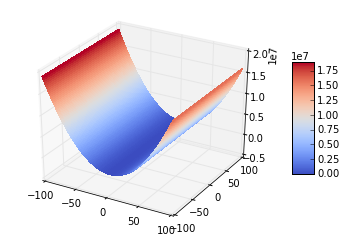

In [159]:
fig = plt.figure()
ax = fig.gca(projection='3d')


m=np.array(range(-N,N))
b=np.array(range(-N,N))

y_2_hat = (y**2).mean()
x_y_2_hat = (x * y**2).mean()
y_hat = y.mean()
x_2_hat = (x**2).mean()
x_hat = x.mean()
n=x.shape[0]

err = se_line(n,m,b,y_2_hat, x_y_2_hat, y_hat, x_2_hat, x_hat)

X,Y = np.meshgrid(m,b)
Z=err

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

We can see intuitively from the plane above, which is error across a given $m$ & $b$, that if we find the point were error is minimum we can find a point $m$ & $b$ that is optimal for our regression line. 

We can use calculus to find the minimum of the error function by solving for partial deriviate of $m$ & $b$ set equal to 0. We know that when a deriviave is equal to 0 of a continous function it can either be the max or min.

$$SE_{line}=(n\overline{y^2}) -2m(n\overline{xy^2}) -2b(n\overline{y})+ m^2(n\overline{x^2}) +2mb(n\overline{x})+nb^2$$

$$  \frac{\partial SE_{line}}{\partial m} = 0 $$

$$  \frac{\partial SE_{line}}{\partial b} = 0 $$

$$ -2n \overline{xy} + 2n\overline{x^2}m + 2bn\overline{x} = 0  $$ 

$$ -2n \overline{y} + 2mn\overline{x} + 2bn = 0  $$ 

Now we have a system of equtions, where `m` & `n` will give us the smallest error. So if we find $m$ & $b$ we will have minimuzed the squared error. Let's simply the expressions by diving by $2n$:

$$ -\overline{xy} + m \overline{x^2} +b \overline{x}=0$$

$$ m \overline{x} +b = \overline{y}0$$

We can rearrange the terms...

$$   m \overline{x^2} +b \overline{x}=\overline{xy}$$

$$ m \overline{x} +b =\overline{y}$$

Solve the system...

$$   m = \frac{\overline{x} * \overline{y} - \overline{xy}}{(\overline{x})^2 - \overline{x^2}} $$

$$ b = \overline{y} - m\overline{x}$$

Now, in theory we have the tools we need to make linear regressions, let's try it out w/ a custom implemention using our work from above and then compare it to the popular scikit-learn implementation.

## Custom Linear Regression Implementation

We now have a simple solution to find the regression line, let's consider our example from the beginning:

In [160]:
x_y_hat = (x * y).mean()
y_hat = y.mean()
x_2_hat = (x**2).mean()
x_hat = x.mean()

m = (x_hat * y_hat - x_y_hat) / ((x_hat)**2 - x_2_hat)
b = y_hat - m * x_hat
house_regression = lambda x: m*x+b
(m,b)

(1.0350662106879434, 0.3563794030886327)

So our regression line is: 

In [161]:
print "y=%fx+%f"%(m,b)

y=1.035066x+0.356379


Now, lets test it w/ a 10 square foot house (a value outside of our orginial dataset) :

In [162]:
custom_prediction = house_regression(10)
custom_prediction

10.707041509968066

## Scikit learn Implementation

Now that we know the theory behind the linear regression algorithm, let's implement it w/ scikit learn:

In [163]:
from sklearn import linear_model

In [164]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets

# inputs into vector format
_x = x.reshape(len(x),1)
_y = y.reshape(len(y),1)
regr.fit(_x,_y)

# The coefficients
print('Coefficients: \n', regr.coef_)



('Coefficients: \n', array([[ 1.03506621]]))


## Conclusion

Now let's compare the results of our custom implemention against sci-kit:

In [165]:
scikit_prediction = regr.predict(10)

print custom_prediction
print scikit_prediction[0][0]

10.70704151
10.70704151


As you can see our custom implementation returns the same answer as the sci-kit implementation!

###  Appendix

The reason we choose squared error error is because of the nice shape that squared errors will make when we make a graph of the squared error vs m and b. The graph will make a 3-d parabola with the smallest square error being at our optimally chosen m and b. Since this graph has only 1 minimum value it is really nice since we can always find this minimum, and the minimum will be unique. If we use higher exponents it would be harder to find the minimum value(s), and we could find possibly non unique minimums or only local minimums (values that look good compared to the neighbouring values but not the absolute best). So, in summary we used squared error because it gives us a minimum that is easy to find and is guaranteed to be the only minimum (this guarantees it is the best!).